# Capstone Webscrapping using BeautifulSoup

(Please insert the background here )



dateparser provides modules to easily parse localized dates in almost any string formats commonly found on web pages.

In [1]:
!pip install dateparser

In [15]:
import requests
import dateparser
url_get = requests.get('https://news.mifx.com/kurs-valuta-asing?kurs=JPY')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [16]:
url_get.content[1:777]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://news.mifx.com/" target="_self" />\n<title>Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini</title>\n<meta property="og:title" content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" />\n<meta name="description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />\n<meta property="og:description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [17]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 1045 character. 

In [18]:
print(soup.prettify()[:1045])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://news.mifx.com/" target="_self"/>
  <title>
   Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini
  </title>
  <meta content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" property="og:title"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " name="description"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " property="og:description"/>
  <meta content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," name="keywords"/>
  <meta content="favicon.jpg?v=1570462055" property="og:image"/>
  <meta content="Ultimaen

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell.

Cell dibawah digunakan untuk mengambil data yang kita inginkan dengan `.find()`, untuk parameter 'table' dan class didapatkan saat kita melakukan inspect pada web pengambilan data.

In [19]:
table = soup.find('table',attrs={'class':'centerText newsTable2'})
print(table.prettify()[1:500])

table cellpadding="10" cellspacing="0" class="centerText newsTable2" width="100%">
 <tr class="colorWhite fontsize14 firstRow">
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   07 Agustus 2020
  </td>
  <td>
   139,42
  </td>
  <td>
   138,02
  </td>
 </tr>
 <tr>
  <td>
   06 Agustus 2020
  </td>
  <td>
   138,88
  </td>
  <td>
   137,48
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   05 Agustus 2020
  </td>
  <td>
   139,


Cell ini untuk mengambil semua object yang berada diantara `tr`

In [20]:
tr = table.find_all('tr')
tr

[<tr class="colorWhite fontsize14 firstRow">
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>07 Agustus 2020</td>
 <td>139,42</td>
 <td>138,02</td>
 </tr>,
 <tr>
 <td>06 Agustus 2020</td>
 <td>138,88</td>
 <td>137,48</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>05 Agustus 2020</td>
 <td>139,23</td>
 <td>137,84</td>
 </tr>,
 <tr>
 <td>04 Agustus 2020</td>
 <td>139,19</td>
 <td>137,79</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>03 Agustus 2020</td>
 <td>139,72</td>
 <td>138,32</td>
 </tr>]

Do the scrapping process here

Fungsi dibawah digunakan untuk mengambil object-object yang diinginkan yang kemudian dijadikan sebagai sebuah list/array

In [21]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]

    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip()

    ask = row.find_all('td')[1].text
    ask = ask.strip()

    bid = row.find_all('td')[2].text
    bid = bid.strip()
    #scrapping process
    temp.append((tanggal,ask,bid))
temp 

[('07\xa0Agustus\xa02020', '139,42', '138,02'),
 ('06\xa0Agustus\xa02020', '138,88', '137,48'),
 ('05\xa0Agustus\xa02020', '139,23', '137,84'),
 ('04\xa0Agustus\xa02020', '139,19', '137,79'),
 ('03\xa0Agustus\xa02020', '139,72', '138,32')]

Put the array into dataframe

In [22]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Tanggal','Kurs_Jual','Kurs_Beli'))
df.head()

,Tanggal,Kurs_Jual,Kurs_Beli
0,07 Agustus 2020,"139,42","138,02"
1,06 Agustus 2020,"138,88","137,48"
2,05 Agustus 2020,"139,23","137,84"
3,04 Agustus 2020,"139,19","137,79"
4,03 Agustus 2020,"139,72","138,32"


Do the data cleaning here
Kita melakukan data wrangling untuk mengganti type data
`'Tanggal' menjadi 'datetime64'`|
`'Kurs_Beli' dan 'Kurs_Jual' menjadi 'float64'`

In [25]:
df['Kurs_Jual'] = df['Kurs_Jual'].apply(lambda x: x.replace(',', '.'))
df['Kurs_Beli'] = df['Kurs_Beli'].apply(lambda x: x.replace(',', '.'))

In [26]:
df['Tanggal'] = df['Tanggal'].apply(dateparser.parse)
df[['Kurs_Jual','Kurs_Beli']] = df[['Kurs_Jual','Kurs_Beli']].astype('float64')

In [36]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'],format=('%d-%m-%Y'))

In [37]:
df

,Tanggal,Kurs_Jual,Kurs_Beli
0,2020-08-07,139.42,138.02
1,2020-08-06,138.88,137.48
2,2020-08-05,139.23,137.84
3,2020-08-04,139.19,137.79
4,2020-08-03,139.72,138.32


Do the data visualisation here

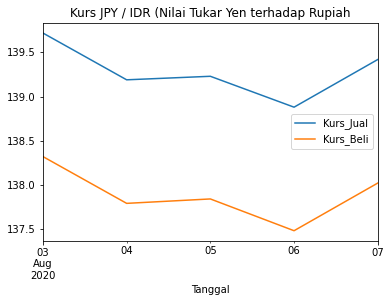

In [41]:
df.set_index('Tanggal').plot(title='Kurs JPY / IDR (Nilai Tukar Yen terhadap Rupiah')

Dari hasil visualisasi web scrapping yang saya lakukan untuk mengambil data kurs Japan Yen ke Rupiah, saya menganalisa bahwa nilai kurs jual lebih tinggi dari kurs beli. Kemudian kedua nilai tersebut cenderung sejajar, dimana ketika kurs jual naik, kurs beli juga naik, begitu juga sebaliknya. Pada tanggal 3 Agustus 2020 - 7 Agustus 2020 nilai tertinggi terdapat pada pada tanggal 3 Agustus, namun terjadi penurunan yang cukup besar dari tanggal 4 Agustus 2020 sampai titik terendah terdapat di tanggal 6 Agustus 2020. Pada tanggal 7 Agustus 2020 terjadi kenaikan yang cukup besar dan hampir mendekati nilai pada tanggal 3 Agustus 2020.